In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier
import numpy as np

<IPython.core.display.Javascript object>


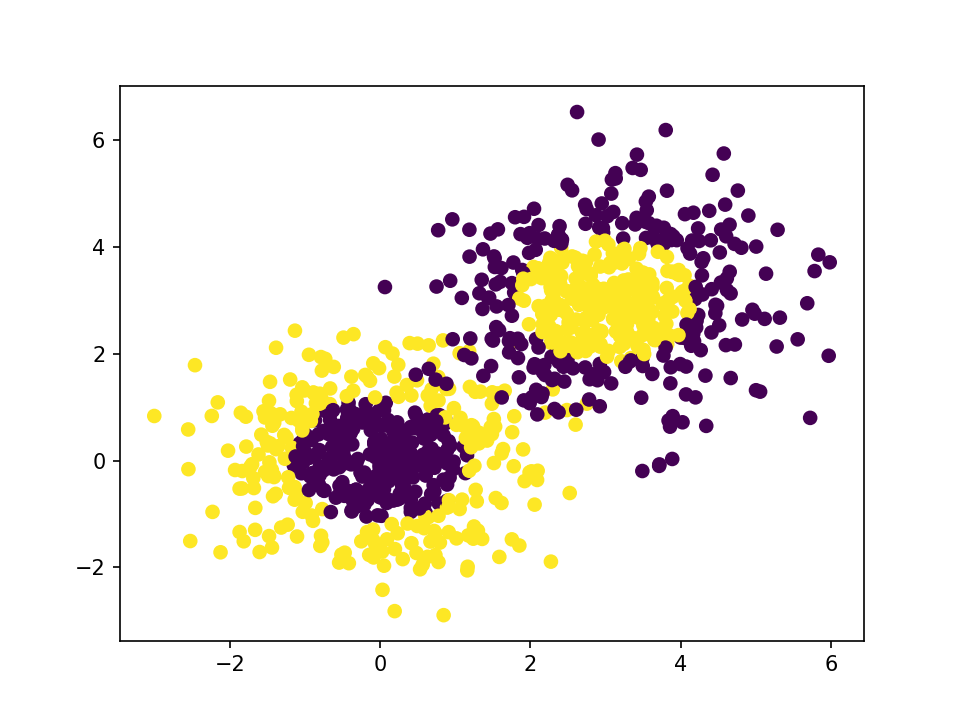

In [2]:
# generate the dataset
x1, y1 = make_gaussian_quantiles(n_samples = 500, n_features=2, n_classes=2)
x2, y2 = make_gaussian_quantiles(mean=(3,3), n_features= 2, n_classes=2, n_samples=500)

x_data = np.r_[x1,x2]
y_data = np.concatenate((y1, - y2 + 1))

plt.scatter(x_data[:, 0], x_data[:, 1], c = y_data)

In [3]:
def plot(model):

    x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, z, camp = plt.cm.Spectral)

    plt.scatter(x_data[:, 0], x_data[:, 1], c = y_data)

# No using AdaBoosting model

<IPython.core.display.Javascript object>


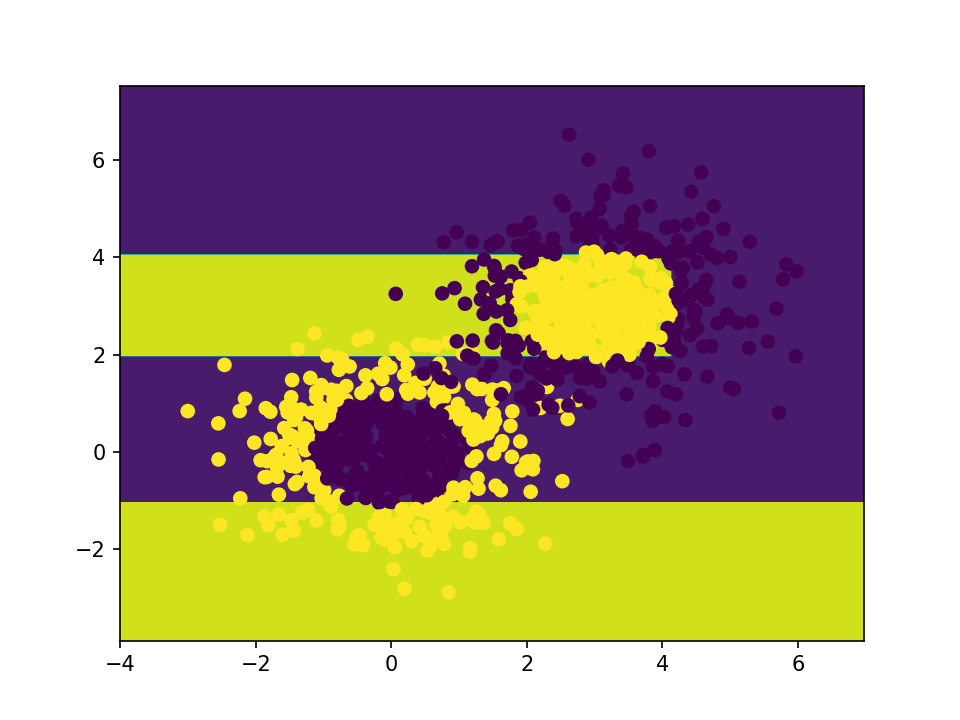

d:\language\python\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'camp'
  s)


0.776

In [4]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_data, y_data)
plot(model)
model.score(x_data,y_data)

# Adaboosting model

<IPython.core.display.Javascript object>


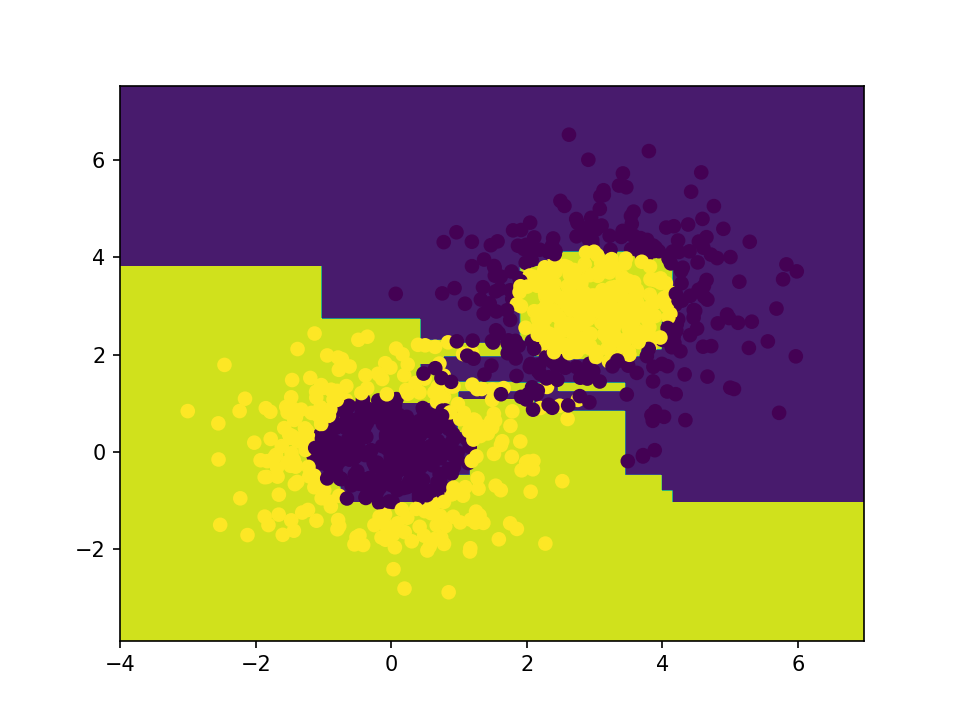

d:\language\python\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'camp'
  s)


0.981

In [5]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=10)
model.fit(x_data, y_data)
plot(model)
model.score(x_data,y_data)